In [1]:
import re
import seaborn as sns
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')

nltk.downloader.download('vader_lexicon')
#import string
#from nltk.corpus import stopwords
#stop = stopwords.words("english")
#import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /home/a1ft/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/a1ft/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


In [5]:
from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


Using TensorFlow backend.


In [6]:
from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [7]:
import requests
from bs4 import BeautifulSoup
import re

pages = []
records = []

#collection = ['1', '2', '3', '4', '5', '6','7', '8', '9', '10', '11', '12','13', '14', '15', '16','17', '18', '19', '20', '21', '22', '23', '24', '25']
for i in range (1,60):
    url = 'https://www.flipkart.com/redmi-6-pro-red-64-gb/product-reviews/itmfdswrffgpqv7z?pid=MOBFBH5TGEWCTHKH&page={}'.format(i)
    pages.append(url)

for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    datas = soup.find_all("div", { "class": "_1PBCrt"})
    
    for data in datas:
        if data.find('div', {'class':'row'}) is not None:
            Rating= data.find('div', {'class':'row'}).text[0:1]
        if data.find('p', {'class':'_2xg6Ul'}) is not None:
            Review = data.find('p', {'class':'_2xg6Ul'}).text
        if data.find('div', {'class':'qwjRop'}) is not None:
            Detailed_Review = data.find('div', {'class':'qwjRop'}).text[:-9]
        records.append((Rating,Review,Detailed_Review))
    
import pandas as pd
df = pd.DataFrame(records, columns=['Rating','Review','Detailed_Review'])

df.to_csv('atanu.csv', index=False, encoding='utf-8')
df = pd.read_csv('atanu.csv', encoding='utf-8')
        
    

In [8]:
review_data = pd.read_csv('/home/a1ft/atanu.csv')


In [9]:
review_data

,Rating,Review,Detailed_Review
0,5,Excellent,Very nice phone
1,4,Wonderful,nice in low price
2,5,Fabulous!,nice @@👍👍👌👌
3,5,Simply awesome,very nice phone...must buy!😍😍
4,4,Pretty good,eveything in phone is very good but flipkart d...
...,...,...,...
585,5,Brilliant,awesome
586,2,Could be way better,ok
587,5,Super!,amazing phone in a discount price ....
588,5,Brilliant,good


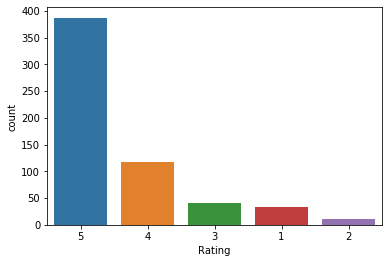

In [10]:
sns.countplot(data=review_data, x="Rating", order = review_data['Rating'].value_counts().index)

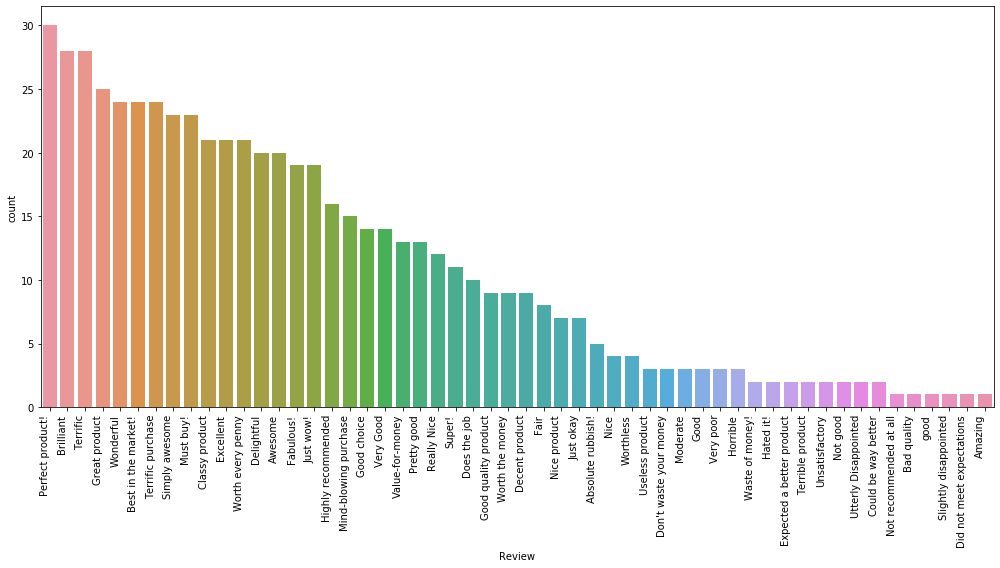

In [11]:
plt.figure(figsize=(14,8))
ax = sns.countplot(data=review_data, x="Review", order = review_data['Review'].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [12]:
def data_clean( rev, remove_stopwords=True): 
    

    new_text = re.sub("[^a-zA-Z]"," ", rev)
   
    words = new_text.lower().split()
    
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer 
    for word in words:
        ary.append(eng_stemmer.stem(word))

    
    return(ary)

In [13]:
clean_Detailed_ReviewData = []
for rev in review_data['Detailed_Review']:
    clean_Detailed_ReviewData.append( " ".join(data_clean(rev)))
    
clean_Review_Data = []
for rev in review_data['Review']:
    clean_Review_Data.append( " ".join(data_clean(rev)))

In [14]:
Most_used_Words_Detailed_Review =pd.Series(' '.join(clean_Detailed_ReviewData).lower().split()).value_counts()[:1200]
print (Most_used_Words_Detailed_Review)

good        224
nice        133
phone       106
product      81
mobil        67
           ... 
switch        1
discount      1
name          1
word          1
handll        1
Length: 484, dtype: int64


In [15]:
Most_used_Words_Review = pd.Series(' '.join(clean_Review_Data).lower().split()).value_counts()[:1200]
print (Most_used_Words_Review)

product           108
good               56
terrif             52
awesom             43
purchas            39
worth              30
perfect            30
brilliant          28
money              27
great              25
wonder             24
market             24
best               24
buy                23
nice               23
must               23
simpli             23
penni              21
classi             21
excel              21
everi              21
delight            20
wow                19
fabul              19
recommend          17
high               16
blow               15
mind               15
choic              14
valu               13
pretti             13
realli             12
super              11
qualiti            10
job                10
decent              9
fair                8
okay                7
wast                5
rubbish             5
absolut             5
better              4
worthless           4
poor                3
useless             3
expect    

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(clean_Detailed_ReviewData)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names(), text_vectorizer.idf_))

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = review_data.Detailed_Review[:100]
for test in sample_review:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.4754, 
neg: 0.0, 
neu: 0.393, 
pos: 0.607, 
Very nice phone
compound: 0.1779, 
neg: 0.304, 
neu: 0.29, 
pos: 0.406, 
nice in low price
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
nice @@👍👍👌👌
compound: 0.5244, 
neg: 0.0, 
neu: 0.47, 
pos: 0.53, 
very nice phone...must buy!😍😍
compound: 0.2724, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
eveything in phone is very good but flipkart dilevry is to much late
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
best budget phone
compound: 0.4215, 
neg: 0.0, 
neu: 0.517, 
pos: 0.483, 
nice one form mi
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
nices
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
nice looking
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Battery performance below the expectations
compound: 0.5859, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
wow
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Mind blowing product
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.0, 
neg: 0.0, 
neu

In [18]:
test_reviewText = review_data.Detailed_Review
test_Ratings = review_data.Rating
text_vectorizer = TfidfVectorizer(max_df=.8)
text_vectorizer.fit(test_reviewText)
def rate(r):
    ary2 = []
    for rating in r:
        tv = [0,0,0,0,0]
        tv[rating-1] = 1
        ary2.append(tv)
    return np.array(ary2)

In [19]:
test_reviewText =test_reviewText[:2000]
test_reviewText

0                                        Very nice phone
1                                      nice in low price
2                                            nice @@👍👍👌👌
3                          very nice phone...must buy!😍😍
4      eveything in phone is very good but flipkart d...
                             ...                        
585                                              awesome
586                                                   ok
587               amazing phone in a discount price ....
588                                                 good
589    Good Quality phone and Good grip... looking so...
Name: Detailed_Review, Length: 590, dtype: object

In [20]:
test_Ratings = test_Ratings[:2000]
test_Ratings

0      5
1      4
2      5
3      5
4      4
      ..
585    5
586    2
587    5
588    5
589    5
Name: Rating, Length: 590, dtype: int64

In [21]:
X = text_vectorizer.transform(test_reviewText).toarray()
y = rate(test_Ratings.values)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
#Specifying the input shape
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
#compilation
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#training
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Train on 472 samples, validate on 118 samples
Epoch 1/10
472/472 [==============================] - 0s 587us/step - loss: 0.4629 - accuracy: 0.8000 - val_loss: 0.4114 - val_accuracy: 0.8000
Epoch 2/10
472/472 [==============================] - 0s 72us/step - loss: 0.3937 - accuracy: 0.8047 - val_loss: 0.3522 - val_accuracy: 0.8288
Epoch 3/10
472/472 [==============================] - 0s 70us/step - loss: 0.3504 - accuracy: 0.8640 - val_loss: 0.3217 - val_accuracy: 0.8729
Epoch 4/10
472/472 [==============================] - 0s 86us/step - loss: 0.3266 - accuracy: 0.8754 - val_loss: 0.3074 - val_accuracy: 0.8847
Epoch 5/10
472/472 [==============================] - 0s 68us/step - loss: 0.3113 - accuracy: 0.8742 - val_loss: 0.3027 - val_accuracy: 0.8881
Epoch 6/10
472/472 [==============================] - 0s 77us/step - loss: 0.2988 - accuracy: 0.8814 - val_loss: 0.2987 - val_accuracy: 0.8881
Epoch 7/10
472/472 [==============================] - 0s 69us/step - loss: 0.2879 - accuracy: 0

0.8864406943321228

In [23]:
history = model.fit(X_train, y_train, nb_epoch=10, validation_data=(X_test, y_test), shuffle=True)

model.test_on_batch(X_test, y_test)
model.metrics_names

Train on 472 samples, validate on 118 samples
Epoch 1/10
472/472 [==============================] - 0s 70us/step - loss: 0.2501 - accuracy: 0.8979 - val_loss: 0.3063 - val_accuracy: 0.8864
Epoch 2/10
472/472 [==============================] - 0s 69us/step - loss: 0.2413 - accuracy: 0.9017 - val_loss: 0.3087 - val_accuracy: 0.8831
Epoch 3/10
472/472 [==============================] - 0s 81us/step - loss: 0.2338 - accuracy: 0.9059 - val_loss: 0.3128 - val_accuracy: 0.8797
Epoch 4/10
472/472 [==============================] - 0s 71us/step - loss: 0.2266 - accuracy: 0.9106 - val_loss: 0.3150 - val_accuracy: 0.8831
Epoch 5/10
472/472 [==============================] - 0s 75us/step - loss: 0.2199 - accuracy: 0.9140 - val_loss: 0.3193 - val_accuracy: 0.8797
Epoch 6/10
 32/472 [=>............................] - ETA: 0s - loss: 0.1889 - accuracy: 0.9250

/home/a1ft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


472/472 [==============================] - 0s 90us/step - loss: 0.2136 - accuracy: 0.9148 - val_loss: 0.3229 - val_accuracy: 0.8797
Epoch 7/10
472/472 [==============================] - 0s 73us/step - loss: 0.2080 - accuracy: 0.9178 - val_loss: 0.3269 - val_accuracy: 0.8814
Epoch 8/10
472/472 [==============================] - 0s 82us/step - loss: 0.2025 - accuracy: 0.9182 - val_loss: 0.3346 - val_accuracy: 0.8695
Epoch 9/10
472/472 [==============================] - 0s 75us/step - loss: 0.1981 - accuracy: 0.9216 - val_loss: 0.3395 - val_accuracy: 0.8695
Epoch 10/10
472/472 [==============================] - 0s 78us/step - loss: 0.1934 - accuracy: 0.9212 - val_loss: 0.3395 - val_accuracy: 0.8746


['loss', 'accuracy']